<a href="https://colab.research.google.com/github/marcinwolter/Machine-learning-KISD-2022/blob/main/lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

Lecture 2 


##**<font color = "green">Decorrelaton, overtraining, simple classifiers: <br> kNN, Decision Tree</font>**

*2 March 2022*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_20.png)


#<font color='green'>**Topics:**


* <span style="color:#00000A">Decorrelation and Principal Component Analysis \(PCA\) </span>

* <span style="color:#00000A">Overtraining</span>

* <span style="color:#00000A">Simple non\-linear methods like k\-nearest neighbors and decision trees\.</span>

<br>
<br>

<span style="color:#C9211E"> **All slides are available here:** </span>  
https://github.com/marcinwolter/Machine-learning-KISD-2022


<span style="color:#800000"> __Principal Component Analysis \(PCA\)__ </span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_213.png)

<span style="color:#000000">Nicely explained in:</span>

<span style="color:#000000">[http://docshare04\.docshare\.tips/files/12598/125983744\.pdf](http://docshare04.docshare.tips/files/12598/125983744.pdf)</span>

#<font color='green'>**Decorrelation:**

<span style="color:#800000"> __Removes correlation between variables by a rotation in the space of variables__ </span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_26.png)

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_27.png)



# **How to decorrelate?**

**Covariance matrix:**
$$
\begin{bmatrix} Var(x_{1}) & ... & Cov(x_{1},x_{n})\\ : &. & :\\ :& \: \: \: \: \: \: \: \: \: \: .& :\\ Cov(x_{n},x_{1}) & ... & Var(x_{n}) \end{bmatrix}
$$

where:
* Sample Variance: $var(x) =  \frac{\sum_{1}^{n}\left ( x_{i} -\overline{x}\right )^{2} }{n-1}$
* Sample Covariance: $ cov(x, y) = \frac{\sum_{1}^{n}\left ( x_{i} -\overline{x}\right )\left ( y_{i}-\overline{y} \right ) }{n-1} $

 * $\bar{x} = $ mean of sample data.
 * $n =$ number of observations in the dataset.
 * $x_i = $ observations in dataset $x$.

The decorrelated dataset $x$ is given by:
$$x ⟶ (C')^{−1}x $$ 

where $C'$ is the square-root of covariance matrix C. 
It is a matrix 
that multiplied with itself yields $C:~~C = (C' * C')$.<br>
We compute the square-root matrix by using the *scipy.linalg.sqrtm()* function and than invert it using *np.linalg.inv()*. 



Covariance matrix:
[[0.75693565 0.28186631]
 [0.28186631 0.39288421]]


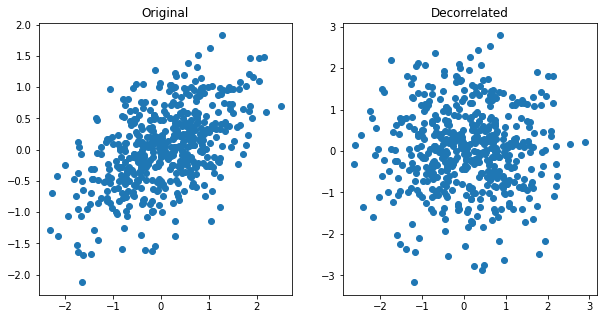

Decorrelating matrix:
[[ 1.27583482 -0.41829103]
 [-0.41829103  1.816089  ]]
Covariance matrix after decorrelation:
[[ 1.00000000e+00 -2.13162821e-16]
 [-2.13162821e-16  1.00000000e+00]]
Covariance matrix is diagonal now.


In [64]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from scipy.linalg import sqrtm

import matplotlib.pyplot as plt

# Real covariance
real_cov = np.array([[.8, .3],
                     [.3, .4]])
rng = np.random.RandomState(0)

# generate data
X = rng.multivariate_normal(mean=[0, 0],
                            cov=real_cov,
                            size=500)

# Calculate covariance matrix
cov = EmpiricalCovariance().fit(X).covariance_  
print("Covariance matrix:")
print(cov)

# Plot data
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1])
plt.title("Original")

# Calculate the inverted sqare root of covariance matrix
cov_prime = np.linalg.inv(sqrtm(cov))

#  X_deco = inv(sqrtm(Cov))*X
for i in range(len(X)):
  X[i,:] = np.dot((cov_prime),X[i,:])

plt.subplot(122)
plt.scatter(X[:,0],X[:,1])
plt.title("Decorrelated")
plt.show()

print("Decorrelating matrix:")
print(cov_prime)

print("Covariance matrix after decorrelation:")
print(EmpiricalCovariance().fit(X).covariance_)
print("Covariance matrix is diagonal now.")




#<font color='green'>**Simple classificators**

* <span style="color:#000000">We have learned about:</span>
  * <span style="color:#000000">Classificators:</span>
    * <span style="color:#000000">Cuts</span>
    * <span style="color:#000000">Fisher Linear Discriminant</span>
    * <span style="color:#000000">Naive Bayes</span>
  * <span style="color:#000000">Unsupervised method</span>
    * <span style="color:#000000">Decorrelation (just in next minutes)</span>
    * <span style="color:#000000">Principal Component Analysis</span>
* <span style="color:#000000">Today we will talk about:</span>
  * <span style="color:#000000">Overtraining problem\.</span>
  * <span style="color:#000000">Other discrimimants: k\-nearest neighbors\, decission tree</span>
  
  * <span style="color:#000000">Example of face classification – eigenfaces\.</span>



#<font color='green'>**ROC curve** 
###**(see previous lecture\)**

* <span style="color:#000000">ROC  \(Receiver Operation Characteristic\) curve was first used to calibrate radars\.</span>
* <span style="color:#000000">Shows the background rejection \(1\-ε</span>  <span style="color:#000000">B</span>  <span style="color:#000000">\)</span>  <span style="color:#000000"> vs signal efficiency ε</span>  <span style="color:#000000">B</span>  <span style="color:#000000">\. Shows how good the classifier is\.</span>
* <span style="color:#000000">The integral of ROC could be a measure of the classifier quality:</span>
  * Integral\(ROC\) = ½ – random
  * Integral\(ROC\) = 1  \- ideal

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_221.png)

#**Classification Accuracy**

* <span style="color:#000000">Classification accuracy is the ratio of correct predictions to total predictions made\.</span>
  * <span style="color:#000000"> __classification accuracy = correct predictions / total predictions__ </span>
* <span style="color:#000000">It is often presented as a percentage by multiplying the result by 100\.</span>
  * <span style="color:#000000"> __classification accuracy = correct predictions / total predictions \* 100__ </span>
* <span style="color:#000000">Classification accuracy can also easily be turned into a misclassification rate or error rate by inverting the value\, such as:</span>
  * <span style="color:#000000"> __error rate = \(1 \- \(correct predictions / total predictions\)\) \* 100__ </span>

<span style="color:#800000"> __Confusion matrix__ </span>

<span style="color:#000000">Example confusion matrix \(recognition of dogs vs\. cats\)</span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_222.png)

<span style="color:#800000"> __Confusion Matrix__ </span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_223.png)

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_224.png)



#<font color='green'> __Overtraining__ </span>  <span style="color:#000000"> – algorithm “learns” the particular events\, not the rules\.</span>

<span style="color:#800000"> __This effect is important for all ML algorithms\.__ </span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/ok.png)
![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/overtrained.png)

* classifier properly trained (left)
* **overtraining** (right). Instead of learning some general rules classifier "memorizes" events from the training dataset. For another statistically independent dataset the performance would be much worse.

<font color='red'> __Remedy – checking with another\, independent dataset\.__ </span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_225.png)

Proper training.

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_226.png)

During training the loss is similar for both training and validation dataset.

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_227.png)

**Overtraining!**


![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_228.png)

**Overtraining. We should stop training before (approximately where the losses start to be different)!**

*This example was created uing a neural network classifier*



#<font color='green'> __KNN \- k nearest neighbors__ </span>

<span style="color:#000000">Proposed already in 1951</span>

<span style="color:#000000">An event is qualified to the class\, to which belongs the majority of it’s k nearest neighbors\, </span>
<span style="color:#000000">or the probability of belonging to the class “signal” is calculated as:</span>

###$$ p(S|x) =\frac{k_S}{k} $$

The number of $k$ nearest neighbours is a free parameter.

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_230.png)



<span style="color:#270A29">The only parameter that can adjust the complexity of KNN is the number of neighbors </span>  <span style="color:#270A29"> _k_ </span>  <span style="color:#270A29">\. </span>
<span style="color:#270A29">The larger </span>  <span style="color:#270A29"> _k_ </span>  <span style="color:#270A29">is\, the smoother the classification boundary\. Or we can think of the complexity of KNN as lower when </span>  <span style="color:#270A29"> _k_ </span>  <span style="color:#270A29">increases\.</span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_231.png)

* solid line - decision boundary
* dashed line - true Bayes Decision Boundary

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_232.png)



# **KNN example**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


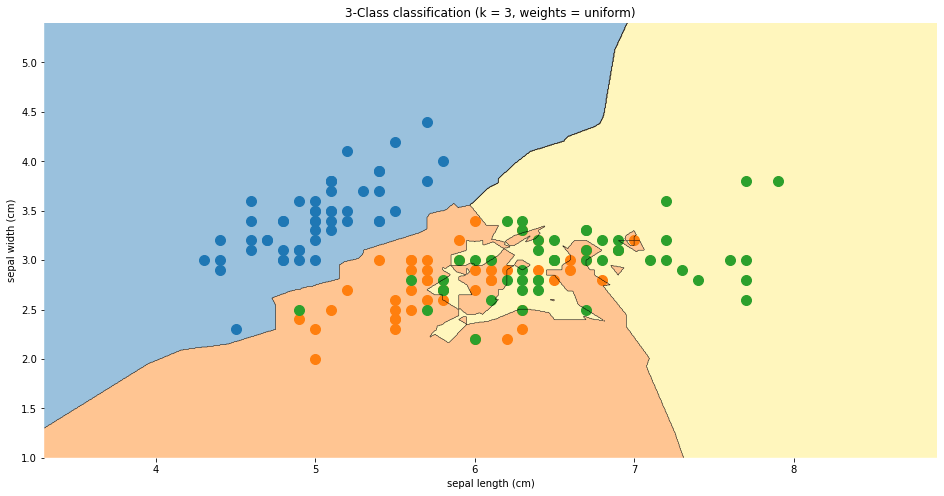

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

from mlxtend.plotting import plot_decision_regions

n_neighbors = 3

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_bold = ["darkorange", "c", "darkblue"]


# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
clf.fit(X, y)

plt.figure(figsize=(16, 8))
plot_decision_regions(X, y, clf=clf, legend=0, colors='#1f77b4,#ff7f0e,#ffec6e')   

# Plot also the training points
for i in range(3):
    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=100)


plt.title(
        "3-Class classification (k = %i, weights = uniform)" % (n_neighbors)
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

#<font color='red'> **Exercise:**
* play with the parameter *n_neighbours*. How does the classification depend on this parameter?

# <font color='green'> **Decision trees**

* <span style="color:#000000">**Decision tree** – a series of cuts\, each „leaf” \(A\,B\,C\,D\,E\) has a label\, for example ”signal” and “background”\.</span>

* <span style="color:#000000">Easy in visualization and interpretation</span>

* <span style="color:#000000">Resistant for </span>  <span style="color:#000000"> _outliers_ </span>  <span style="color:#000000">\. </span>

* <span style="color:#000000">Weak variables are ignored\.</span>

* <span style="color:#000000">Fast training and classification\.</span>

* <span style="color:#000000">**Unfortunately:** </span>  <span style="color:#000000"> __sensitive for fluctuations\, unstable__ </span>  <span style="color:#000000">\. </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_234.png' width=350px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_235.png' width=350px>





# <font color='green'> **Building the tree**



* <span style="color:#000000">We start from the root\.</span>

* <span style="color:#000000">We divide the training sample by the best separating cut on the best variable\.</span>

* <span style="color:#000000">We repeat the procedure until the stopping conditions are fulfilled\, for example: number of leafs\, number of events in a leaf etc\. </span>

* <span style="color:#000000">The ratio S/B in a leaf defines the classification \(binary signal or background\, or a real number giving the probability\, that a given event is a signal\)\.</span>

<span style="color:#000000"> __Definitions of separation:__ </span>

* <span style="color:#000000">Gini inpurity:  \(</span>  <span style="color:#000000"> _Corrado Gini 1912\, invented the Gini index used to measure the inequality of incomes_ </span>  <span style="color:#000000">\)</span>

$$ purity = p (1-p), ~~  : p= P(signal)$$, 

* <span style="color:#000000">Cross\-entropy:</span>

$$cross\_entropy = -(p \ln p + (1-p)\ln(1-p))$$

* <span style="color:#000000">Missidentification:</span>

$$miss\_identification = 1-max(p,1-p)$$



# **Example of classifier use**


In [66]:
%matplotlib inline


# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


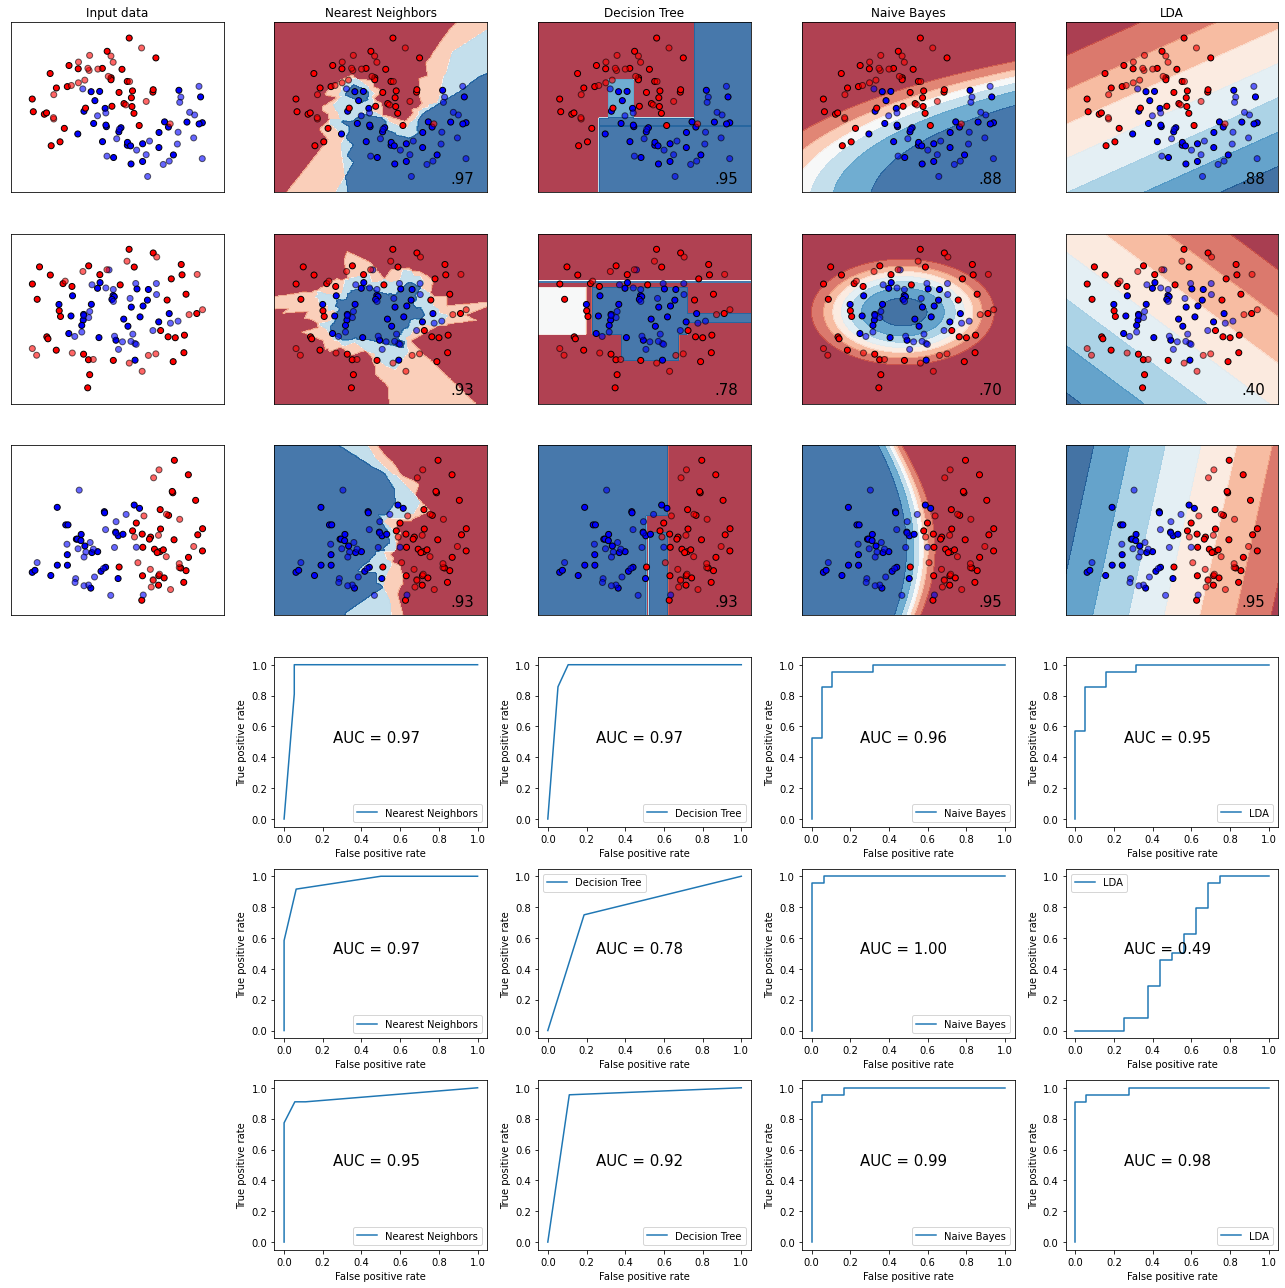

In [67]:

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# Modified by MW

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

h = .02  # step size in the mesh

names = ["Nearest Neighbors", 
         "Decision Tree", 
         "Naive Bayes","LDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    LinearDiscriminantAnalysis()
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(18, 18))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(2*len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(2*len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        if (name=='MLP'):
          mlp=clf

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        # plot the roc curve
        ax = plt.subplot(2*len(datasets), len(classifiers) + 1, i+len(datasets)*(len(classifiers)+1))
        ZZ = clf.predict_proba(X_test)[:, 1]
        #print(y_test.shape,"   ",Z.shape)
        fpr, tpr, _ = roc_curve(y_test, ZZ)
        ax.plot(fpr, tpr, label=name)
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        #plt.title('ROC curve')
        plt.legend(loc='best')
        auc = roc_auc_score(y_test, ZZ)
        ax.text(0.7, 0.5, ('AUC = %.2f' % auc),
                size=15, horizontalalignment='right')


        i += 1

plt.tight_layout()
plt.show()

**Remark**:

We have plotted the ROC curve and calculated the integral.


# <font color='red'> **Exercise:**
* play with the parameters of classifiers
* and the number of generated data points.


#<font color='green'> **Kernel density estimators**

<span style="color:#000000">Approximation of the unknown probability density as a sum of kernel functions centered in the points x</span>  <span style="color:#000000">n</span>  <span style="color:#000000"> of the training sample \(Parzen\, years 1960\-ties\)\. </span>

$$ D(X) = \frac{P(S)}{P(S)+P(B)} $$

<span style="color:#000000">Typical kernel functions:
>  Gaussian, $\frac{1}{x^n}$  <span style="color:#000000"> itp\.</span>





<span style="color:#000000">Simple idea\, but using this method requires a lot of memory and CPU\.</span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_245.png)

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_246.png)

Approximated probability density \(blue\) comapared to the true probability density \(green\) as a function of the width of the Gaussian kernel function\. We can see\, that the width is a smoothing parameter\.



<span style="color:#800000"> __QUAERO package from the D0 experiment__ </span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_247.png)

_Phys\. Rev\. Lett\. 87 \(2001\) 231801\,_



#<font color='green'> **PDE\_RS – extension of the Parzen methods**

*published by T\. Carli\, B\. Koblitz\, NIM A 501 \(2003\) 576\-588*

<span style="color:#000000">Counts signal $n_S$ and background $n_B$ events in N\-dimensional cube around the classified event – only few events from the training sample are needed\. </span>
<span style="color:#000000">Size of the cube is a free parameter\.</span>



* <span style="color:#000000">Simple analysis\.</span>

* <span style="color:#000000">Events stored in the binary tree – the neighbor events are found quickly\.</span>

* <span style="color:#000000">It’s a special case of Parzen method – the kernel function: </span>

$$ f(x) = \left\{
\begin{eqnarray}
0 ~&if&outside~box \\
1 ~&if&inside~box \\
\end{eqnarray} \right.
 $$

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_248.png)



# <font color='green'>**Simple 1D example of Parzen method**

In [68]:
%matplotlib inline

# **Kernel Density example**
from https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/ 

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

Generate synthetic data

In [70]:
def generate_data(seed=17):
    # Fix the seed to reproduce the results
    rand = np.random.RandomState(seed)
    x = []
    dat = rand.lognormal(0, 0.3, 1000)
    x = np.concatenate((x, dat))
    dat = rand.normal(3, 1, 1000)
    x = np.concatenate((x, dat))
    return x

Generate data and store in x_train.

Plot data.

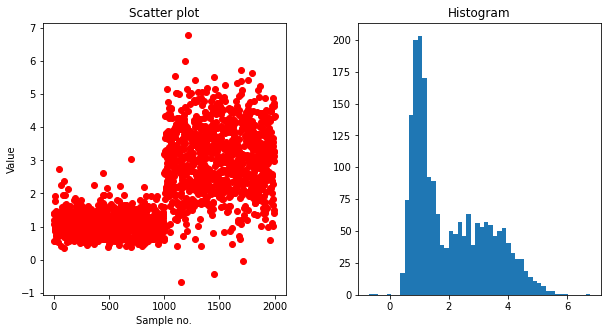

In [71]:
x_train = generate_data()[:, np.newaxis]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')
plt.subplot(122)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)
plt.show()

Generate points x_test between (-4,8)

In [72]:
x_test = np.linspace(-4, 8, 2000)[:, np.newaxis]

Fit model and find a density for each point

In [73]:
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

Plot it

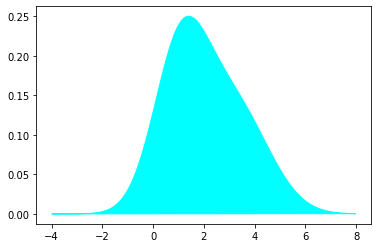

In [74]:
plt.fill(x_test, np.exp(log_dens), c='cyan')
plt.show()

Try different bandwidth (kernel width)

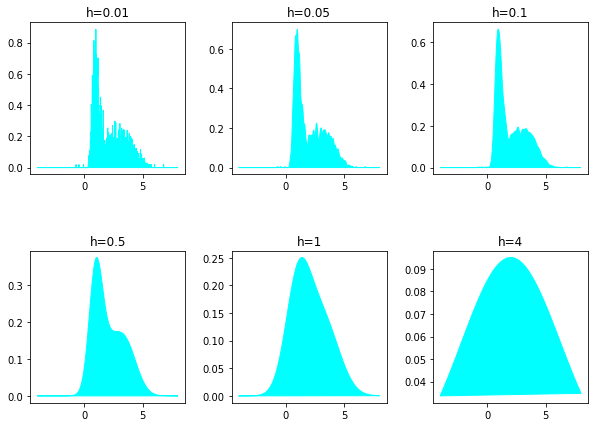

In [75]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()



# <font color='green'>**Classification of faces**

**Use of PCA and various classifiers**

<span style="color:#000000">PCA – each face can be represented as a combination of a limited number of “eigenfaces”</span>


# <font color='red'>**Exercise:**

* try various classifiers
 * KNeighborsClassifier(n_neighbours)
 * GaussianNB()
 * LinearDiscriminantAnalysis()
 * DecisionTreeClassifier(max_depth=jj)


* and various number of PCA eigenfaces 

In [76]:
%matplotlib inline


# Faces recognition example using eigenfaces


The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)


Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
================== ============ ======= ========== =======


Example from https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html
modified by MW

In [87]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA



print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

# number of PCA components
n_components = 8 #32

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train the classification model

print("Fitting the classifier to the training set")
t0 = time()

clf = KNeighborsClassifier(10)
#clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
#clf = DecisionTreeClassifier(max_depth=5)

# Fit the classifier
clf = clf.fit(X_train_pca, y_train)


'''
# Optimize the KNeighborsClassifier
clf = KNeighborsClassifier()
# grid of n_neighbours to be tested
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50, 100], }
clf = GridSearchCV(clf,param_grid,cv=2)
clf = clf.fit(X_train_pca, y_train)
# This value gives the best performance
print('Best params: ',clf.best_params_)
'''

print("done in %0.3fs" % (time() - t0))





# Optimize the KNeighborsClassifier
clf = KNeighborsClassifier()
# grid of n_neighbours to be tested
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50, 100], }
clf = GridSearchCV(clf,param_grid,cv=2)
clf = clf.fit(X_train_pca, y_train)
# This value gives the best performance
print('Best params: ',clf.best_params_)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 8 eigenfaces from 966 faces
done in 0.136s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.013s
Fitting the classifier to the training set
done in 0.004s


In [88]:


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)



print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))




Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.21      0.23      0.22        13
     Colin Powell       0.33      0.57      0.42        60
  Donald Rumsfeld       0.39      0.26      0.31        27
    George W Bush       0.65      0.75      0.69       146
Gerhard Schroeder       0.80      0.16      0.27        25
      Hugo Chavez       0.75      0.20      0.32        15
       Tony Blair       0.30      0.08      0.13        36

         accuracy                           0.51       322
        macro avg       0.49      0.32      0.34       322
     weighted avg       0.53      0.51      0.48       322

[[  3   7   1   2   0   0   0]
 [  6  34   6  13   0   0   1]
 [  1  12   7   7   0   0   0]
 [  2  27   2 109   1   1   4]
 [  0   5   1  13   4   0   2]
 [  0   3   0   9   0   3   0]
 [  2  15   1  15   0   0   3]]


In [89]:
# define a funtion to plot the gallery

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(min(n_row * n_col, len(images))):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


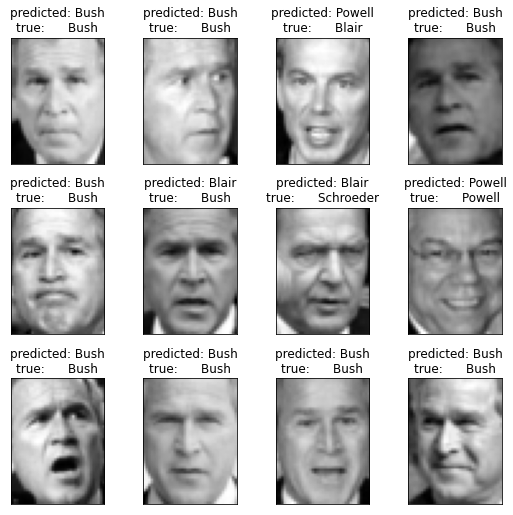

In [90]:

# #############################################################################
# Qualitative evaluation of the predictions using matplotlib
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

plt.show()

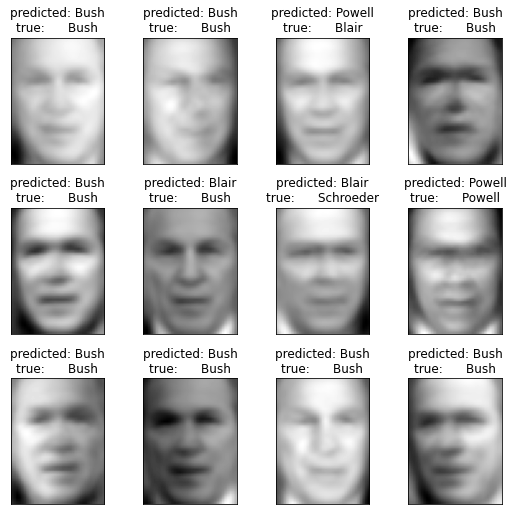

In [91]:
# plot PCA reconstructed faces
plot_gallery(pca.inverse_transform(X_test_pca), prediction_titles, h, w)

plt.show()

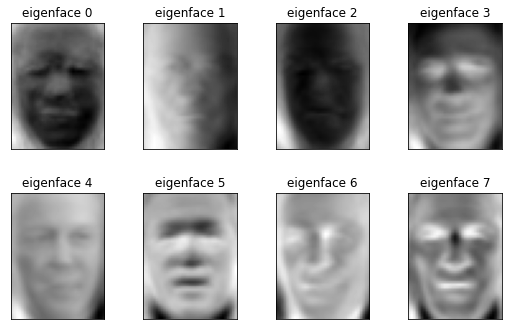

In [92]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, int(eigenfaces.shape[0] / 4)+1, 4) 


plt.show()

#<font color='green'> **Summary**

* <span style="color:#000000">We have learned about simple classifiers…\.</span>
* <span style="color:#000000">\.\.\.how to train them\, how to optimize them\, how to measure their performance\.\.\.</span>
* <span style="color:#000000">\.\.\.and about unsupervised methods like Principal Component Analysis\.</span>
* <span style="color:#000000">Next time we will talk about:</span>
  * <span style="color:#000000">Independent Component Analysis ICA</span>
  * <span style="color:#000000">Boosted Decision Trees BDT</span>

